In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [2]:
X, y = datasets.load_diabetes(return_X_y=True)

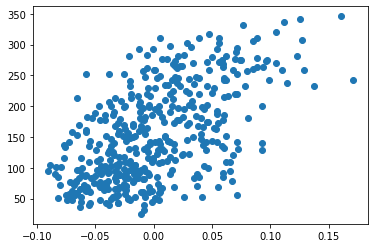

In [3]:
plt.scatter(X.T[2], y)
plt.show()

In [4]:
x = X.T[2]

In [5]:
mean = y.mean()

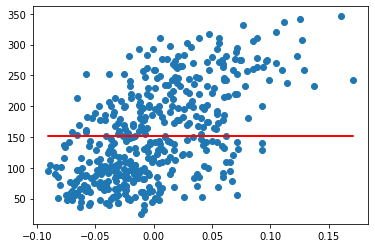

In [6]:
plt.scatter(x, y)
plt.plot(x, [mean]*len(y), c='r')
plt.show()

In [7]:
ss_mean = 0
for item in y:
    ss_mean += (item-mean)**2
print("Sum of Square (mean):", round(ss_mean))

Sum of Square (mean): 2621009


In [8]:
print("Max Y value:", max(y))

Max Y value: 346.0


In [9]:
print("Index number of max Y value:", np.where(y == 346.0))

Index number of max Y value: (array([256]),)


In [10]:
max_y_x = x[256]

In [11]:
weight_range = (max(y)/max_y_x) * 2

In [12]:
weights = list(range(0, int(weight_range), 50))
y_intercepts = list(range(0, int(max(y))))

In [28]:
n = len(x)
history = []

r2_best = None
for weight in weights:
    for y_intercept in y_intercepts:
        ss_fit = 0
        for i in range(n):
            ss_fit += (y[i] - (weight * x[i] + y_intercept))**2
        r2 = (ss_mean-ss_fit)/ss_mean
        history.append([weight, y_intercept, r2])
        if r2_best is None or r2 > r2_best:
            r2_best = r2
            best_weight = weight
            best_intercept = y_intercept
history = np.array(history).T

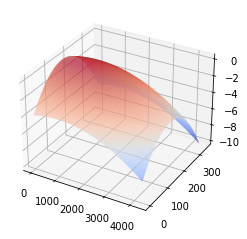

In [41]:
x, y, z = history

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_trisurf(x, y, z, cmap="coolwarm")
plt.show()

In [14]:
print("Best weight:", best_weight)
print("Best y-intercept:", best_intercept)

Best weight: 950
Best y-intercept: 152


In [15]:
model = [best_weight*i + best_intercept for i in sorted(x)]

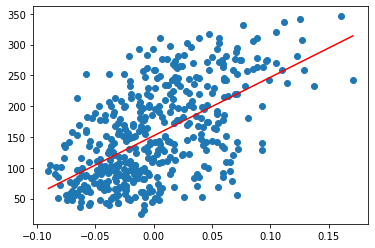

In [16]:
plt.scatter(x, y)
plt.plot(sorted(x), model, c="r")
plt.show()

In [19]:
reg = LinearRegression().fit(x.reshape(-1, 1), y)
print("Weight:", reg.coef_)
print("Y-intercept:", reg.intercept_)

Weight: [949.43526038]
Y-intercept: 152.1334841628967
